In [2]:
import os
import sys
import importlib
import copy
import seaborn as sns
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'distribution_123share_bouton_210519_stacked2'

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

import compress_pickle

# fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_210407_all.gz')
fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/' \
#          'gen_db/mf_grc/input_graph_210519_all.gz')
         'gen_db/mf_grc/input_graph_210520_all_100_2.gz')
input_graph = compress_pickle.load(fname)

mf_size_map = compress_pickle.load('../mf_combination_representation/mf_bouton_210519_compare_dist_mf_size_map.gz')

# z_min = 19800
# z_max = 29800
z_min = 19800
z_max = 29800
# GrCs are fully reconstructed and proofread from 90k to 150k
x_min = 360*1000
x_max = 520*1000

grc_ids = set()
mf_ids = set()

grc_mfs = list()

def get_prob(in_graph, unique_count=False, count_within_box=True, return_counted=False):
    n_common_pairs = 0
    processed = set()
    total_n_pairs = 0
    hist = defaultdict(int)
    n = 0
    counted_grcs = 0
    for grc_i_id in in_graph.grcs:
        n += 1
        grc_i = in_graph.grcs[grc_i_id]
        x, y, z = grc_i.soma_loc
        if count_within_box:
            if x < x_min or x > x_max:
                continue
            if z < z_min or z > z_max:
                continue
        counted_grcs += 1
        grc_ids.add(grc_i_id)
        rosettes_i = set([mf[1] for mf in grc_i.edges])
        grc_mfs.append(list(rosettes_i))
        for r in rosettes_i:
            mf_ids.add(r)
    return grc_mfs

get_prob(input_graph, count_within_box=True, return_counted=True)

# print(grc_mfs)

[[(462279, 472330, 26622), (497826, 446604, 24178), (505960, 451338, 32979), (481350, 458912, 33406), (488358, 464179, 38249)], [(465239, 418836, 13140), (498900, 438259, 25822), (465780, 445264, 22480), (456595, 465648, 21910), (488358, 464179, 38249)], [(453391, 452305, 14855), (482584, 476290, 15214), (449236, 475669, 12717), (488358, 464179, 38249)], [(452086, 453471, 34870), (487889, 463277, 21124), (462279, 472330, 26622), (488358, 464179, 38249)], [(479351, 461551, 17523), (497826, 446604, 24178), (481350, 458912, 33406), (468090, 435256, 28124), (488358, 464179, 38249)], [(517528, 467883, 19972), (521024, 452851, 7702), (485240, 435685, 28983), (488358, 464179, 38249)], [(358851, 450949, 28053), (385147, 439989, 27083), (321643, 418897, 13474), (337532, 425725, 30185), (379441, 442302, 29766)], [(357473, 428086, 15046), (359992, 414626, 28517)], [(358891, 412603, 22461), (381377, 437983, 19745), (399922, 424594, 33184), (395855, 414280, 25845), (381460, 430297, 15432), (381502,

defaultdict(<class 'int'>, {'mid': 312, 'hi': 548, 'low': 135})
270
353


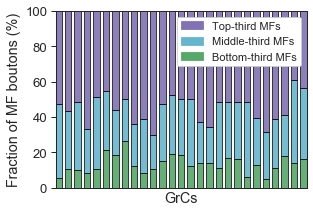

In [160]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
# print(mf_sizes); asdf
mf_sizes_order = [k for k,v in mf_sizes]
# print(len(mf_sizes_order))

grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
#     print(i)
    if i < (len(mf_sizes_order)/3): return 'low'
    elif i < (len(mf_sizes_order)*2/3): return 'mid'
    else: return 'hi'

grc_mfs_size = []
i = 0
mpd = MyPlotData()
every=10; bar_width = .682
# every=7; bar_width = .7

sizes = defaultdict(int)
total_sizes = defaultdict(int)
s = 0
for mfs in grc_mfs_copy:
    for mf in mfs:
        if mf in mf_sizes_order:
            cat = to_category(mf)
            sizes[cat] += 1
            total_sizes[cat] += 1
            s += 1
#     print(sizes)
    if s:
        # normalize size
#         for k, v in sizes.items():
#             sizes[k] = v/s
        i += 1
        if i%every == (every-1):
            mpd.add_data_point(
#                 grc_id=int(i/every),
                grc_id=i,
                low=sizes['low'],
                mid=sizes['mid'],
                hi=sizes['hi'],
            )
            s = 0
            sizes = defaultdict(int)
# mpd.data
edgecolors=None
figsize = None
# bar_width = .7
colors = ['#019600', '#3C5F5A', '#219AD8']
figsize = (4.5,3.25)

# colors = sns.color_palette()[3:6]
# colors = [sns.color_palette()[3], sns.color_palette()[8], sns.color_palette()[5]]
cscheme = sns.color_palette('deep')
colors = [cscheme[2], cscheme[9], cscheme[4]]  # willie color 1
# colors = [cscheme[4], cscheme[9], cscheme[2]]  # willie color 1
# colors = ['white', sns.color_palette()[9], sns.color_palette()[4]]
edgecolors = ['black']*3
plot_stacked_bar(mpd, colors=colors, edgecolors=edgecolors, figsize=figsize, bar_width=bar_width)
print(total_sizes)
print(len(grc_mfs_copy))
print(len(mf_sizes_order))

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_stacked_bar(mpd, colors, figsize=(4,3.25), bar_width=0.7, edgecolors=None):
    df = mpd.to_dataframe()
    if edgecolors is None:
        edgecolors = colors
    # Create a figure with a single subplot
    f, ax = plt.subplots(1, figsize=figsize)
#     f, ax = plt.subplots(1, figsize=(4.1,3.25))
#     bar_width = .7
    bar_width = bar_width
    # positions of the left bar-boundaries
    bar_l = [i for i in range(len(df['low']))] 
    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(bar_width/2) for i in bar_l] 
    # Create the total score for each participant
    totals = [i+j+k for i,j,k in zip(df['low'], df['mid'], df['hi'])]
    # Create the percentage of the total score the pre_score value for each participant was
    pre_rel = [i / j * 100 for  i,j in zip(df['low'], totals)]
    # Create the percentage of the total score the mid_score value for each participant was
    mid_rel = [i / j * 100 for  i,j in zip(df['mid'], totals)]
    # Create the percentage of the total score the post_score value for each participant was
    post_rel = [i / j * 100 for  i,j in zip(df['hi'], totals)]

    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using pre_rel data
           pre_rel, 
           # labeled 
           label='Pre Score', 
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[0],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=edgecolors[0],
           )
    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using mid_rel data
           mid_rel, 
           # with pre_rel
           bottom=pre_rel, 
           # labeled 
           label='Mid Score', 
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[1],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=edgecolors[1],
           )
    # Create a bar chart in position bar_1
    ax.bar(bar_l, 
           # using post_rel data
           post_rel, 
           # with pre_rel and mid_rel on bottom
           bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
           # labeled 
           label='Post Score',
           # with alpha
           alpha=0.9, 
           # with color
           color=colors[2],
           # with bar width
           width=bar_width,
           # with border color
           edgecolor=edgecolors[2],
           )
    # Set the ticks to be first names
    # plt.xticks(tick_pos, df['first_name'])
    ax.set_ylabel("Fraction of MF boutons (%)")
    ax.set_xlabel("GrCs")
    ax.set_xticks([])
    # Let the borders of the graphic
    plt.xlim([min(tick_pos)-bar_width, max(tick_pos)])
    plt.ylim(0, 100)
    # rotate axis labels
    # plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    # shot plot
#     plt.show()
    ax.grid(False)
#     plt.axis('off')
#     plt.grid(b=None)
#     ax.set_facecolor((1,1,1))
    # add legend
    top_bar = mpatches.Patch(color=colors[2], label='Top-third MFs')
    mid_bar = mpatches.Patch(color=colors[1], label='Middle-third MFs')
    bottom_bar = mpatches.Patch(color=colors[0], label='Bottom-third MFs')
    plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', fontsize=11,
              framealpha=1)
    # save
    plt.savefig(f'{script_n}_fig.svg', bbox_inches='tight', transparent=True)

In [178]:
grc_mfs_copy

[[(472903, 417534, 44394),
  (486693, 402018, 26124),
  (485240, 435685, 28983),
  (480679, 434057, 39068),
  (477542, 418393, 28922),
  (463050, 430303, 35959),
  (503020, 412925, 24521)],
 [(358891, 412603, 22461),
  (370268, 426302, 8542),
  (348241, 423014, 29894),
  (350466, 431773, 8635)],
 [(398722, 468128, 32698),
  (376600, 469994, 27113),
  (358291, 465640, 42533),
  (362717, 448761, 44043)],
 [(493203, 446509, 34722),
  (499494, 427153, 19628),
  (523755, 453962, 23000),
  (481350, 458912, 33406),
  (507440, 432049, 28300)],
 [(383918, 431855, 30111),
  (347089, 435794, 43640),
  (365459, 461059, 18728),
  (343276, 446467, 15765),
  (348401, 438266, 21318)],
 [(462252, 441534, 27517),
  (447372, 431321, 17710),
  (436761, 451875, 33746),
  (468090, 435256, 28124)],
 [(458215, 406067, 18565),
  (452568, 422585, 19153),
  (453286, 402234, 8898),
  (464788, 402160, 6225),
  (466472, 397967, 36602),
  (455848, 404156, 24370)],
 [(469105, 429569, 23760),
  (453391, 452305, 14855)

defaultdict(<class 'int'>, {'hi': 548, 'mid': 312, 'low': 135})
270
353


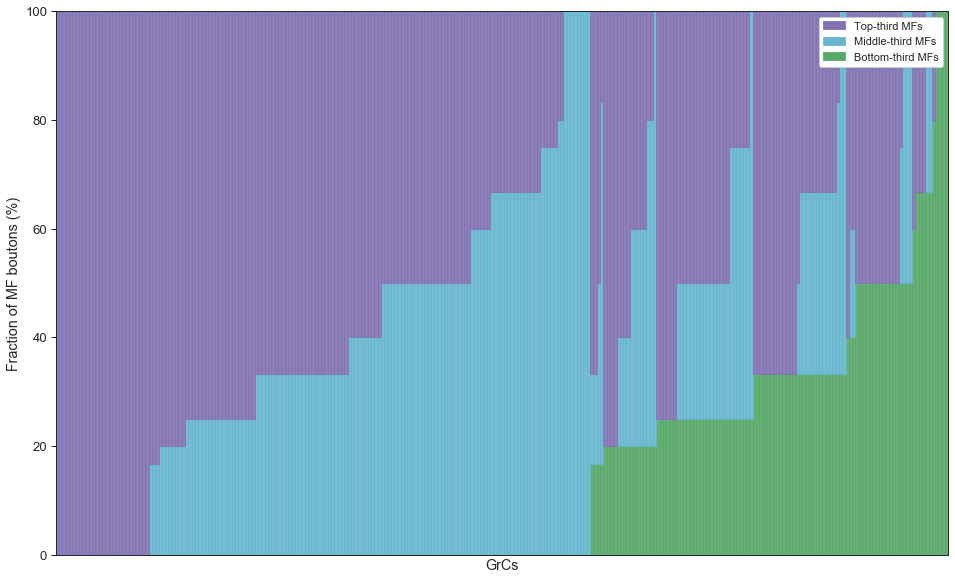

In [188]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
# print(mf_sizes); asdf
mf_sizes_order = [k for k,v in mf_sizes]
# print(len(mf_sizes_order))

grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
#     print(i)
    if i < (len(mf_sizes_order)/3): return 'low'
    elif i < (len(mf_sizes_order)*2/3): return 'mid'
    else: return 'hi'

grc_mfs_size = []
i = 0
mpd = MyPlotData()
every=1

def my_sort(x):
    cats = []
    for mf in x:
        if mf in mf_sizes_order:
            cat = to_category(mf)
            cats.append(cat)
    if len(cats):
        num_lows = cats.count('low')/len(cats)
        num_meds = cats.count('mid')/len(cats)
        num_highs = cats.count('hi')/len(cats)
#         return num_lows + num_meds*1000 + num_highs*100000
        return num_highs + num_meds*1000 + num_lows*100000
    else:
        return 0
grc_mfs_copy = sorted(grc_mfs_copy, key=lambda x: my_sort(x))

sizes = defaultdict(int)
total_sizes = defaultdict(int)
s = 0
for mfs in grc_mfs_copy:
    for mf in mfs:
        if mf in mf_sizes_order:
            cat = to_category(mf)
            sizes[cat] += 1
            total_sizes[cat] += 1
            s += 1
    if s:
        i += 1
        if i%every == (every-1):
            mpd.add_data_point(
#                 grc_id=int(i/every),
                grc_id=i,
                low=sizes['low'],
                mid=sizes['mid'],
                hi=sizes['hi'],
            )
            s = 0
            sizes = defaultdict(int)
# mpd.data
# colors = ['#019600', '#3C5F5A', '#219AD8']
import seaborn as sns
cscheme = sns.color_palette('deep')
colors = [cscheme[2], cscheme[9], cscheme[4]]  # willie color 1
# colors = sns.color_palette()[3:6]
# colors = [sns.color_palette()[3], sns.color_palette()[8], sns.color_palette()[5]]
plot_stacked_bar(mpd, colors=colors, figsize=(16,10), bar_width=1)
print(total_sizes)
print(len(grc_mfs_copy))
print(len(mf_sizes_order))

Height: 6, Aspect: 2


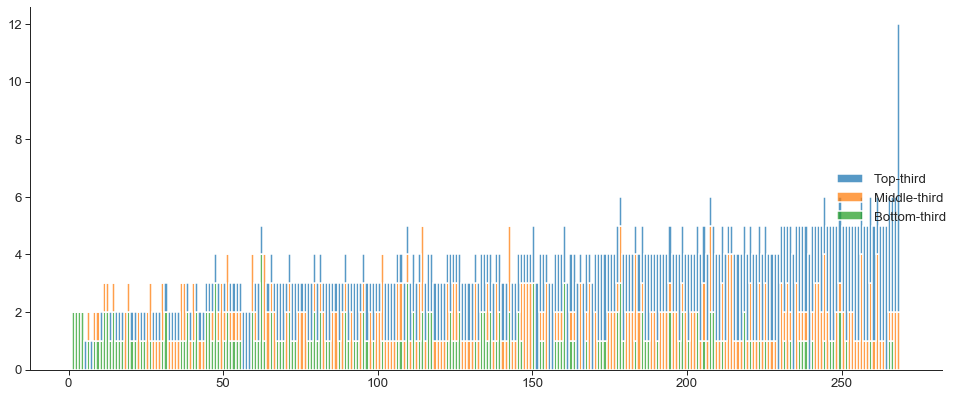

In [167]:
grc_mfs_size = []
for mfs in grc_mfs:
    sizes = []
    for mf in mfs:
        if mf in mf_size_map:
            sizes.append(mf_size_map[mf])
    grc_mfs_size.append(sizes)

import random
random.seed(4)
random.shuffle(grc_mfs_size)

def to_category(s):
    if s < 12:
        c = 'Bottom-third'
    elif s < 18:
        c = 'Middle-third'
    else:
        c = 'Top-third'
    return c

grc_mfs_size = [[to_category(s) for s in k] for k in grc_mfs_size]

def my_sort(x):
    num_lows = x.count('Bottom-third')
    num_meds = x.count('Middle-third')
    num_highs = x.count('Top-third')
    return num_lows + num_meds*2 + num_highs*3
grc_mfs_size = sorted(grc_mfs_size, key=lambda x: my_sort(x))

mpd = MyPlotData()
for i, mfs in enumerate(grc_mfs_size):
    for mf in sorted(mfs):
#         c = to_category(mf)
        mpd.add_data_point(
            grc_id=i,
#             mf=mf,
            mf_class=mf,
        )
        
# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='grc_id',
#     y='mf',
    hue='mf_class',
#     hue_order=['Bottom-third', 'Middle-third', 'Top-third'],
    hue_order=['Top-third', 'Middle-third', 'Bottom-third'],
    
    kind='hist',
    binwidth=1,
    
#     kind='kde',
    multiple='stack',
    context='paper',
#     linewidth=2.5,
#     kde=True,
#     stat='density',
    height=6,
    aspect=2,
#     y_axis_label='# of 2-share GrC partners',
#     x_axis_label='Sorted GrCs',
#     save_filename=f'{script_n}_line.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )

Height: 3, Aspect: 1.3333333333333333


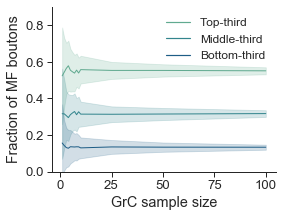

In [378]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
mf_sizes_order = [k for k,v in mf_sizes]

grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
#     print(i)
    if i < (len(mf_sizes_order)/3): return 'low'
    elif i < (len(mf_sizes_order)*2/3): return 'mid'
    else: return 'hi'

grc_mfs_size = []
i = 0
mpd = MyPlotData()
every=1

def get_composition(grcs):
    sizes = defaultdict(int)
    s = 0
    for mfs in grcs:
        for mf in mfs:
            if mf in mf_sizes_order:
                cat = to_category(mf)
                sizes[cat] += 1
                s += 1
    for cat in sizes:
        sizes[cat] /= s
    return sizes
    
subsampling = .5
n_trials = 1000

# for subsampling in [.0125/4, .0125/2, .0125, .025, .05, .1, .25, .5, .75, 1]:
# for subsampling in [1, 2, 5, 10, 25, 50, 75, 100]:
# for subsampling in [1, 2, 3, 4, 6, 7, 9, 25, 50]:

typename = {
    'hi': 'Top-third',
    'mid': 'Middle-third',
    'low': 'Bottom-third',
}

for subsampling in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 100]:
    random.seed(0)
    if subsampling > 10:
        n_trials = 200
    for i in range(n_trials):
        random.shuffle(grc_mfs_copy)
        subsampled_grcs = grc_mfs_copy[0:subsampling]
        composistion = get_composition(subsampled_grcs)
        for type in ['hi', 'mid', 'low']:
            mpd.add_data_point(
                trial=i,
                subsampling=subsampling,
#                 subsampling_pop=subsampling,
                type=typename[type],
                val=composistion[type]
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)
    
palette = ['#3182BD', '#9ECAE1', '#DEEBF7']
palette = sns.color_palette("crest", as_cmap=False, n_colors=3)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='subsampling', y='val',
#     style='type',
    hue='type',
    kind='line',
    ci='sd',
    palette=palette,
    x_axis_label='GrC sample size',
    y_axis_label='Fraction of MF boutons',
    ylim=(0, .9),
#     xlim=(10, 100),
#     xticks=[0, 10, 20, 30, 40, 50],
#     log_scale_x=True,
#     height=3, width=4,
    height=3, width=4,
    custom_legend_fn=custom_legend_fn,
)


# cscheme = sns.color_palette('deep')
# colors = [cscheme[2], cscheme[9], cscheme[4]]  # willie color 1
# # colors = sns.color_palette()[3:6]
# # colors = [sns.color_palette()[3], sns.color_palette()[8], sns.color_palette()[5]]
# plot_stacked_bar(mpd, colors=colors, figsize=(16,10), bar_width=1)
# print(total_sizes)
# print(len(grc_mfs_copy))
# print(len(mf_sizes_order))

Height: 3, Aspect: 1.3333333333333333


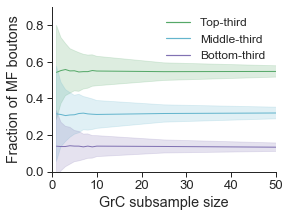

In [377]:
def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)
cscheme = sns.color_palette('deep')
palette = [cscheme[2], cscheme[9], cscheme[4]]  # willie color 1
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='subsampling', y='val',
#     style='type',
    hue='type',
    kind='line',
    ci='sd',
    palette=palette,
    x_axis_label='GrC subsample size',
    y_axis_label='Fraction of MF boutons',
    ylim=(0, .9),
    xlim=(0, 50),
#     xticks=[0, 10, 20, 30, 40, 50],
#     log_scale_x=True,
#     height=3, width=4,
    height=3, width=4,
    custom_legend_fn=custom_legend_fn,
    show=True,
    save_filename=f'{script_n}_subsample.svg',
)

Height: 4, Aspect: 1.0


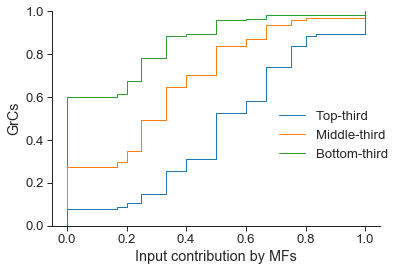

In [368]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
mf_sizes_order = [k for k,v in mf_sizes]
grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
    if i < (len(mf_sizes_order)/3): return 'low'
    elif i < (len(mf_sizes_order)*2/3): return 'mid'
    else: return 'hi'


def get_ratio(grcs, type):
    s = 0
    sizes = defaultdict(int)
    ret = []
    for mfs in grcs:
        for mf in mfs:
            if mf in mf_sizes_order:
                cat = to_category(mf)
                sizes[cat] += 1
                s += 1
        if s:
            ret.append(sizes[type] / s)
        s = 0
        sizes = defaultdict(int)
    return ret

typename = {
    'hi': 'Top-third',
    'mid': 'Middle-third',
    'low': 'Bottom-third',
}

mpd = MyPlotData()
for type in ['hi', 'mid', 'low']:
    ratios = get_ratio(grc_mfs_copy, type)
    for ratio in ratios:
        mpd.add_data_point(
            ratio=ratio,
            type=typename[type]
        )

# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='ratio', hue='type',
    kind='ecdf',
    x_axis_label='Input contribution by MFs',
    y_axis_label='GrCs',
#     ylim=(0, .9),
#     xlim=(10, 100),
#     xticks=[0, 10, 20, 30, 40, 50],
#     log_scale_x=True,
#     height=3, width=4,
    height=4, width=4,
#     custom_legend_fn=custom_legend_fn,
#     palette=palette,
)


Height: 4, Aspect: 1.0


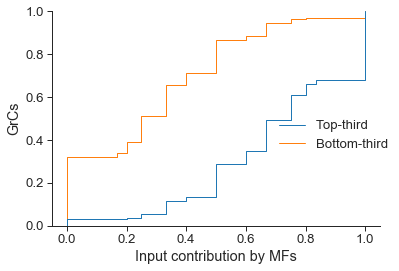

In [369]:
import random

mf_sizes = [(k, v) for k, v in mf_size_map.items()]
random.shuffle(mf_sizes)
mf_sizes = sorted(mf_sizes, key=lambda x: x[1])
mf_sizes_order = [k for k,v in mf_sizes]
grc_mfs_copy = copy.copy(grc_mfs)
random.seed(0)
random.shuffle(grc_mfs_copy)

def to_category(loc):
    i = mf_sizes_order.index(loc)
    if i > (len(mf_sizes_order)/2): return 'hi'
    else: return 'low'


def get_ratio(grcs, type):
    s = 0
    sizes = defaultdict(int)
    ret = []
    for mfs in grcs:
        for mf in mfs:
            if mf in mf_sizes_order:
                cat = to_category(mf)
                sizes[cat] += 1
                s += 1
        if s:
            ret.append(sizes[type] / s)
            s = 0
            sizes = defaultdict(int)
    return ret

typename = {
    'hi': 'Top-third',
    'mid': 'Middle-third',
    'low': 'Bottom-third',
}

mpd = MyPlotData()
for type in ['hi', 'low']:
    ratios = get_ratio(grc_mfs_copy, type)
    for ratio in ratios:
        mpd.add_data_point(
            ratio=ratio,
            type=typename[type]
        )

# def custom_legend_fn(plt):
# #     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
#     plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='ratio', hue='type',
    kind='ecdf',
    x_axis_label='Input contribution by MFs',
    y_axis_label='GrCs',
#     ylim=(0, .9),
#     xlim=(10, 100),
#     xticks=[0, 10, 20, 30, 40, 50],
#     log_scale_x=True,
#     height=3, width=4,
    height=4, width=4,
#     custom_legend_fn=custom_legend_fn,
#     palette=palette,
)
